In [124]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analyser import *

plt.style.use('ggplot')

In [125]:
subs = generate_submissions(users=20, pbls=100)
#subs = import_submissions(course_id = "C00198", dbname="test1")
bm = bianary_mat(subs)

In [126]:
from itertools import product

def succes_mat(subs):
    '''
    '''

    # get lists of unique users and pbls
    users = subs.user_id.unique()
    pbls = subs.problem_id.unique()
    table = pd.DataFrame(data = 0.0, columns=users , index=pbls)

    #couples = subs[subs.veredict == "AC"][["user_id","problem_id"]].values
    for u, p in product(users, pbls):
        ACs = subs[(subs.user_id == u) & (subs.problem_id == p) & 
                           (subs.veredict == "AC")].submission_uid.count()
        TOT = subs[(subs.user_id == u) & (subs.problem_id == p)].submission_uid.count()
        if TOT:
            table[u][p] = float(ACs) / TOT
        else:
            table[u][p] = 0

    return table


In [127]:
bm = bianary_mat(subs)
#bm

In [128]:
sm = succes_mat(subs)
#sm

In [129]:
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Diff_M1_0')
normalize(Difficulties)

Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities_M1_0')
normalize(Abilities)

dfAbl_M1 = pd.DataFrame(Abilities)
dfDiff_M1 = pd.DataFrame(Difficulties)

In [130]:
cnt = 8
for i in range(2,2+cnt):
    Difficulties = process_bianary_mat(bm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
    Abilities = process_bianary_mat(bm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
    dfAbl_M1[Abilities.name] = Abilities
    dfDiff_M1[Difficulties.name] = Difficulties

In [131]:
dfAbl_M1

,Abilities_M1_0,Abilities_M1_2,Abilities_M1_3,Abilities_M1_4,Abilities_M1_5,Abilities_M1_6,Abilities_M1_7,Abilities_M1_8,Abilities_M1_9
U00000,0.223607,0.215539,0.215166,0.215160,0.215161,0.215161,0.215161,0.215161,0.215161
U00001,0.223607,0.221697,0.222082,0.222145,0.222152,0.222152,0.222152,0.222152,0.222152
U00002,0.223607,0.232782,0.232704,0.232652,0.232644,0.232643,0.232643,0.232643,0.232643
U00003,0.223607,0.260494,0.263189,0.263415,0.263436,0.263438,0.263438,0.263438,0.263438
U00004,0.223607,0.229087,0.228629,0.228539,0.228528,0.228526,0.228526,0.228526,0.228526
U00005,0.223607,0.269731,0.272513,0.272689,0.272700,0.272701,0.272701,0.272701,0.272701
U00006,0.223607,0.192753,0.190577,0.190429,0.190419,0.190419,0.190419,0.190419,0.190419
U00007,0.223607,0.220465,0.220277,0.220278,0.220280,0.220280,0.220280,0.220280,0.220280
U00008,0.223607,0.272810,0.276351,0.276617,0.276638,0.276639,0.276640,0.276640,0.276640
U00009,0.223607,0.217386,0.216764,0.216702,0.216695,0.216695,0.216695,0.216695,0.216695


In [132]:
#dfDiff_M1

In [133]:
# dfAbl_M1.plot()

In [134]:
# dfDiff_M1.plot()

In [135]:
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Diff_M2_0')
normalize(Difficulties)

Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities_M2_0')
normalize(Abilities)

dfAbl_M2 = pd.DataFrame(Abilities)
dfDiff_M2 = pd.DataFrame(Difficulties)

cnt = 8
for i in range(2,2+cnt):
    Difficulties = process_bianary_mat(sm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
    Abilities = process_bianary_mat(sm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
    dfAbl_M2[Abilities.name] = Abilities
    dfDiff_M2[Difficulties.name] = Difficulties

In [136]:
# dfAbl_M2.plot()

In [137]:
# dfDiff_M2.plot()

In [138]:
cmp = pd.DataFrame([dfDiff_M1.Diff_M1_9, dfDiff_M2.Diff_M2_9])

In [139]:
cmp

,P00001,P00002,P00003,P00004,P00006,P00007,P00008,P00009,P00011,P00013,...,P00053,P00074,P00077,P00082,P00097,P00012,P00037,P00040,P00059,P00091
Diff_M1_9,0.125729,0.15165,0.075536,0.055848,0.141466,0.093718,0.044810,0.068844,0.104397,0.085531,...,0.122605,0.111615,0.115409,0.094688,0.077485,0.080885,0.092271,0.05008,0.087248,0.115832
Diff_M2_9,0.113824,0.17627,0.080321,0.067138,0.099737,0.121117,0.053431,0.052906,0.097944,0.090750,...,0.143350,0.097803,0.109063,0.083489,0.079652,0.122282,0.069587,0.05113,0.103063,0.093107


<IPython.core.display.Javascript object>


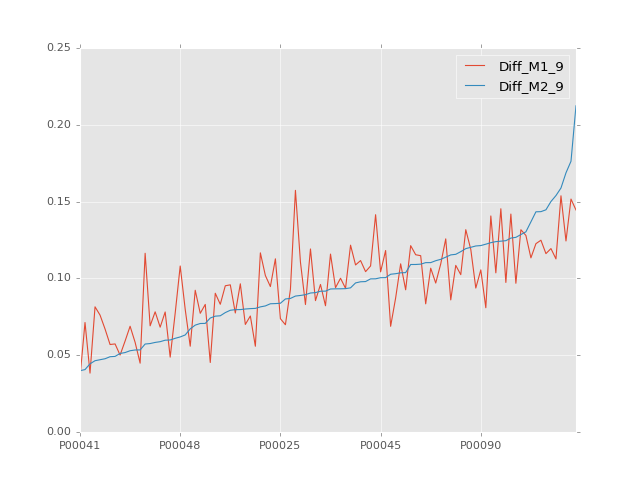

In [142]:
cmpT = cmp.T
cmpT.sort_values(['Diff_M2_9'], inplace=True)
cmpT.plot()

<IPython.core.display.Javascript object>


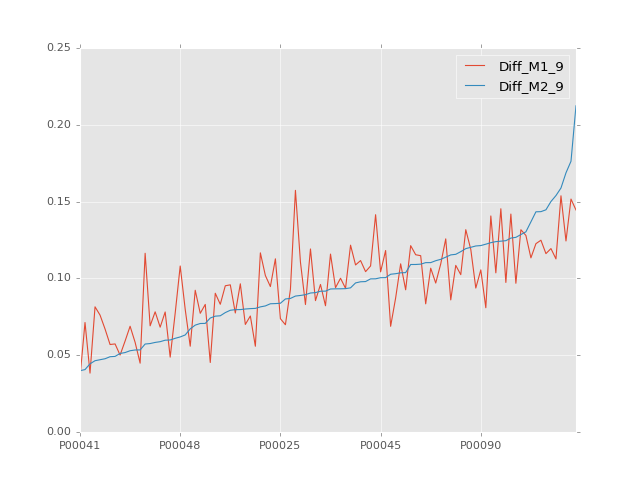

In [143]:
cmpT.sort_values(['Diff_M2_9'], inplace=True)
cmpT.plot()